In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import re
import warnings
from statistics import mode
warnings.filterwarnings('ignore')
plt.style.use('fivethirtyeight')

In [3]:
train = pd.read_csv('../input/titanic/train.csv')
test = pd.read_csv('../input/titanic/test.csv')

In [4]:
target = train.Survived

### EDA (Exploratory Data Analysis)

In [5]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Variable Name | Description
--------------|-------------
Survived      | Survived (1) or died (0)
Pclass        | Passenger's class
Name          | Passenger's name
Sex           | Passenger's sex
Age           | Passenger's age
SibSp         | Number of siblings/spouses aboard
Parch         | Number of parents/children aboard
Ticket        | Ticket number
Fare          | Fare
Cabin         | Cabin
Embarked      | Port of embarkation

In [6]:
print(f'Unique Values in Pclass :{train.Pclass.unique()}')

Unique Values in Pclass :[3 1 2]


In [7]:
print(f'Unique Values in SibSp :{train.SibSp.unique()}')

Unique Values in SibSp :[1 0 3 4 2 5 8]


Hehe!, null values spotted!

In [8]:
print(f'Unique Values in Embarked :{train.Embarked.unique()}')

Unique Values in Embarked :['S' 'C' 'Q' nan]


**Let's look at target feature first**

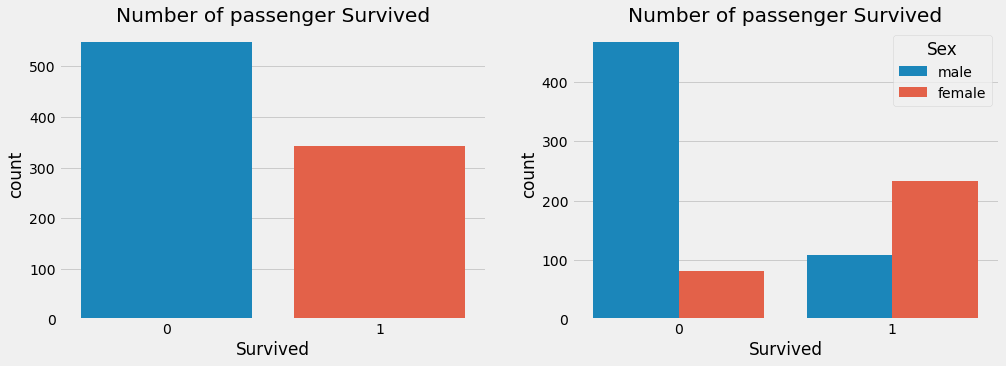

In [9]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.countplot(train.Survived)
plt.title('Number of passenger Survived');

plt.subplot(1,2,2)
sns.countplot(x="Survived", hue="Sex", data=train)
plt.title('Number of passenger Survived');

**So the plot says we have more number of non-survived people and females are more likely to survived than male!. so, 'Sex' looks like a very strong explanatory variable, and it can be good choice for our model!**

**Let's first vizualize null values on our training set on graph**

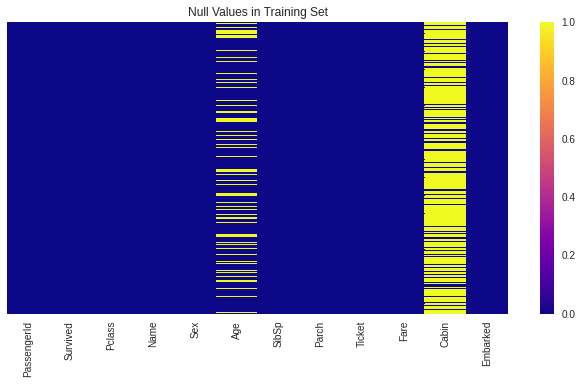

In [10]:
plt.style.use('seaborn')
plt.figure(figsize=(10,5))
sns.heatmap(train.isnull(), yticklabels = False, cmap='plasma')
plt.title('Null Values in Training Set');

**Let's analysize Pclass**

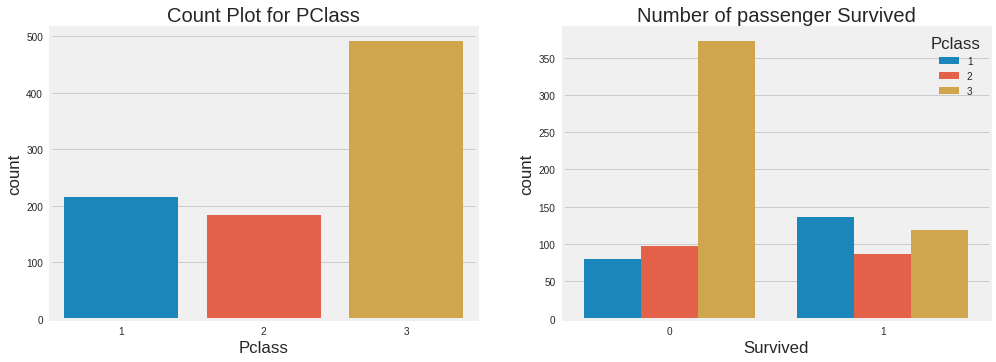

In [11]:
plt.figure(figsize=(15,5))
plt.style.use('fivethirtyeight')

plt.subplot(1,2,1)
sns.countplot(train['Pclass'])
plt.title('Count Plot for PClass');

plt.subplot(1,2,2)
sns.countplot(x="Survived", hue="Pclass", data=train)
plt.title('Number of passenger Survived');

looking at some satistical data!

In [12]:
pclass1 = train[train.Pclass == 1]['Survived'].value_counts(normalize=True).values[0]*100
pclass2 = train[train.Pclass == 2]['Survived'].value_counts(normalize=True).values[1]*100
pclass3 = train[train.Pclass == 3]['Survived'].value_counts(normalize=True).values[1]*100

print("Lets look at some satistical data!\n")
print("Pclaas-1: {:.1f}% People Survived".format(pclass1))
print("Pclaas-2: {:.1f}% People Survived".format(pclass2))
print("Pclaas-3: {:.1f}% People Survived".format(pclass3))

Lets look at some satistical data!

Pclaas-1: 63.0% People Survived
Pclaas-2: 47.3% People Survived
Pclaas-3: 24.2% People Survived


**Wow!, Pclass is also a good feature to train our model.**

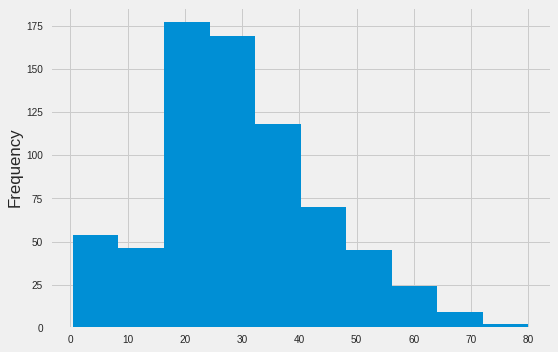

In [13]:
train['Age'].plot(kind='hist')

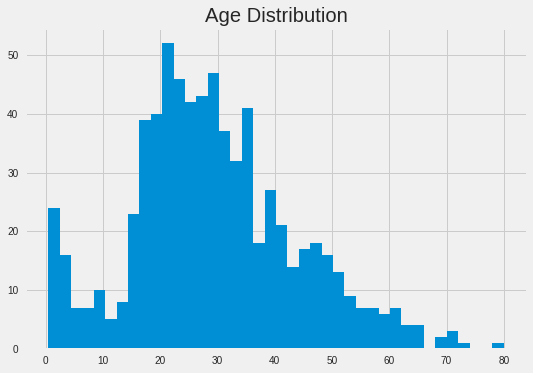

In [14]:
train['Age'].hist(bins=40)
plt.title('Age Distribution');

**Age column has non-uniform data and many outliers**

**Outlier** : An outlier is an observation that lies an abnormal distance from other values in a random sample from a population.

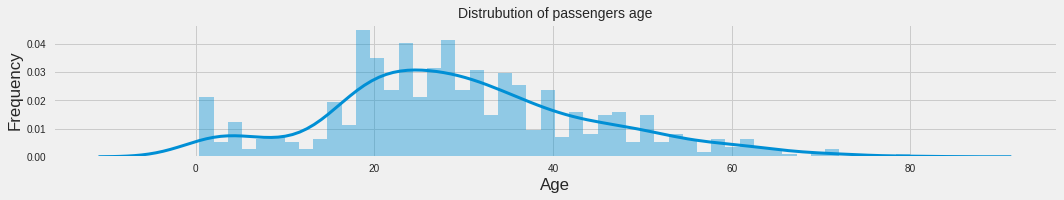

In [15]:
# set plot size
plt.figure(figsize=(15, 3))

# plot a univariate distribution of Age observations 
sns.distplot(train[(train["Age"] > 0)].Age, kde_kws={"lw": 3}, bins = 50)

# set titles and labels
plt.title('Distrubution of passengers age',fontsize= 14)
plt.xlabel('Age')
plt.ylabel('Frequency')
# clean layout
plt.tight_layout()

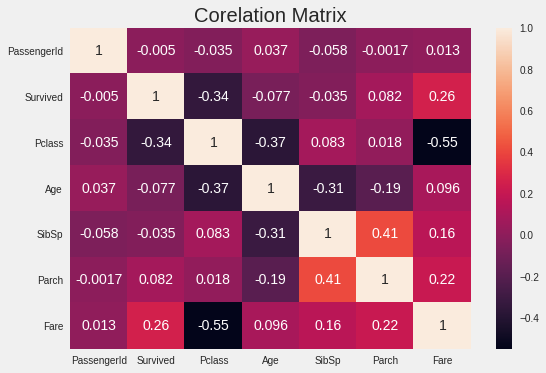

In [19]:
sns.heatmap(train.corr(), annot=True)
plt.title('Corelation Matrix');

**Configure the heatmap**

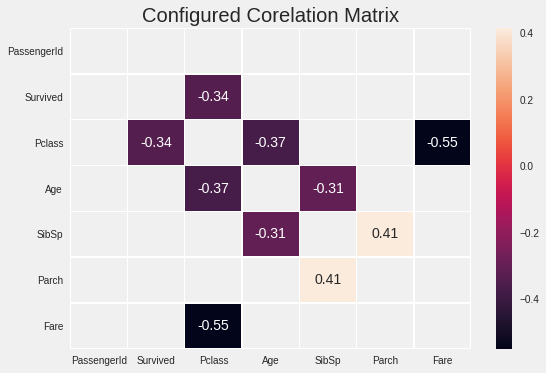

In [20]:
corr = train.corr()
sns.heatmap(corr[((corr >= 0.3) | (corr <= -0.3)) & (corr != 1)], annot=True, linewidths=.5, fmt= '.2f')
plt.title('Configured Corelation Matrix');

**Fare vs Embarked**

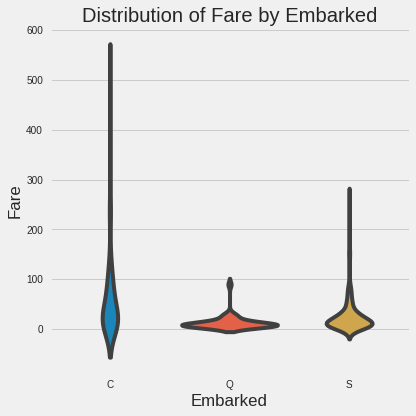

In [21]:
sns.catplot(x="Embarked", y="Fare", kind="violin", inner=None,
            data=train, height = 6, order = ['C', 'Q', 'S'])
plt.title('Distribution of Fare by Embarked')
plt.tight_layout()

- The wider fare distribution among passengers who embarked in Cherbourg. It makes scence - many first-class passengers boarded the ship here, but the share of third-class passengers is quite significant.
- The smallest variation in the price of passengers who boarded in q. Also, the average price of these passengers is the smallest, I think this is due to the fact that the path was supposed to be the shortest + almost all third-class passengers.

**Fare vs Pclass**

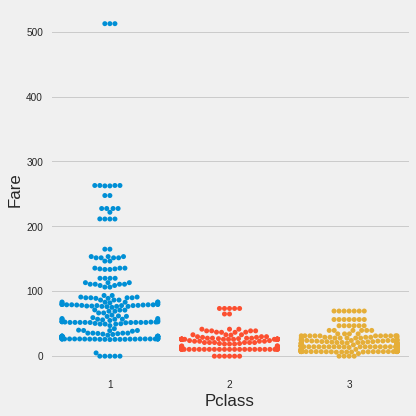

In [22]:
sns.catplot(x="Pclass", y="Fare", kind="swarm", data=train, height = 6)

plt.tight_layout()

We can observe that the distribution of prices for the second and third class is very similar. The distribution of first-class prices is very different, has a larger spread, and on average prices are higher.

Let's add colours to our points to indicate surviving status of passenger (there will be only data from training part of the dataset):

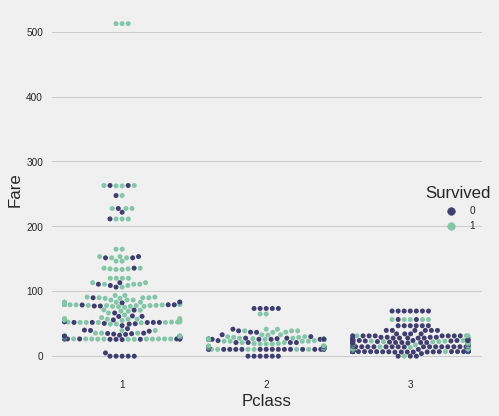

In [23]:
sns.catplot(x="Pclass", y="Fare",  hue = "Survived", kind="swarm", data=train, 
                                    palette=["#3f3e6fd1", "#85c6a9"], height = 6)
plt.tight_layout()

Let's look at some maximum and minimum values of features!

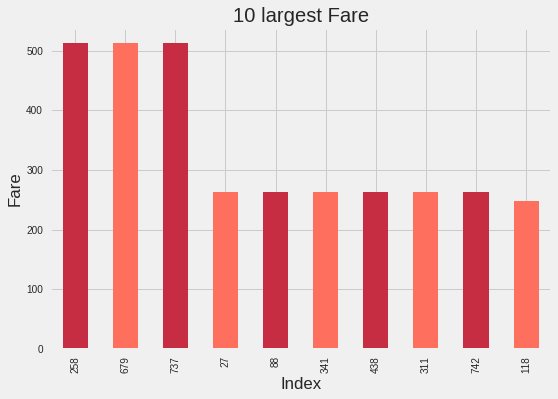

In [24]:
train['Fare'].nlargest(10).plot(kind='bar', title = '10 largest Fare', color = ['#C62D42', '#FE6F5E']);
plt.xlabel('Index')
plt.ylabel('Fare');

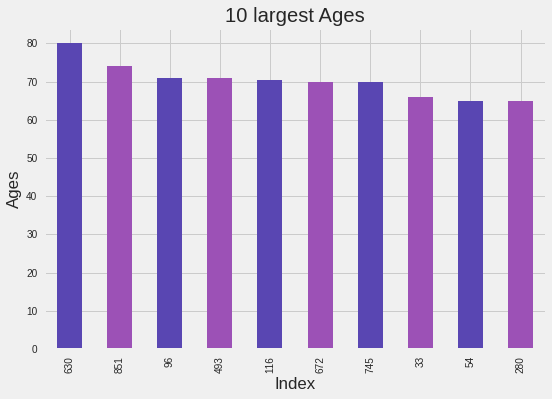

In [25]:
train['Age'].nlargest(10).plot(kind='bar', color = ['#5946B2','#9C51B6']);
plt.title('10 largest Ages')
plt.xlabel('Index')
plt.ylabel('Ages');

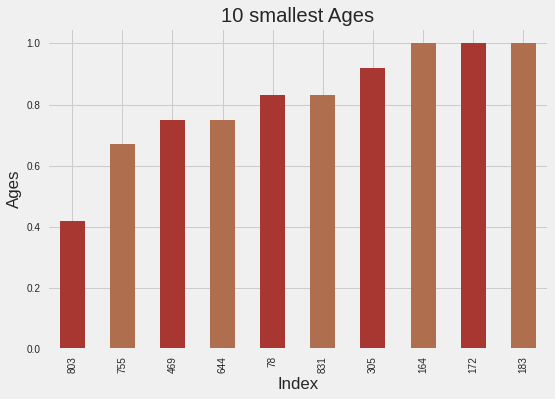

In [26]:
train['Age'].nsmallest(10).plot(kind='bar', color = ['#A83731','#AF6E4D'])
plt.title('10 smallest Ages')
plt.xlabel('Index')
plt.ylabel('Ages');

### Handle Missing Values

Some statistical values of null values in dataset.

In [27]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [28]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

one of the effectitve way to fill the null values is by finding correlation

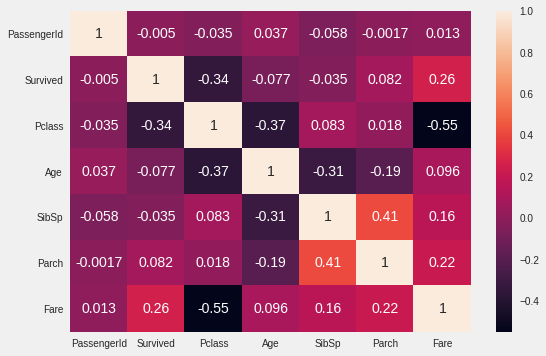

In [29]:
sns.heatmap(train.corr(), annot=True)

> **Pclass and age, as they had max relation in the entire set we are going to replace missing age values with median age calculated per class**

In [30]:
train.loc[train.Age.isnull(), 'Age'] = train.groupby("Pclass").Age.transform('median')


#Same thing for test set
test.loc[test.Age.isnull(), 'Age'] = test.groupby("Pclass").Age.transform('median')

In [31]:
train.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

> **As maximum values in train set is S let's replace it with the null values**

In [32]:
train['Embarked'] = train['Embarked'].fillna(mode(train['Embarked']))

#Applying the same technique for test set
test['Embarked'] = test['Embarked'].fillna(mode(test['Embarked']))

> Also, corr(Fare, Pclass) is the highest correlation in absolute numbers for 'Fare', so we'll use Pclass again to impute the missing values!

In [33]:
train['Fare']  = train.groupby("Pclass")['Fare'].transform(lambda x: x.fillna(x.median()))
test['Fare']  = test.groupby("Pclass")['Fare'].transform(lambda x: x.fillna(x.median()))

In [34]:
train.Cabin.value_counts()

C23 C25 C27    4
B96 B98        4
G6             4
E101           3
F2             3
              ..
F G63          1
B82 B84        1
E31            1
B30            1
A5             1
Name: Cabin, Length: 147, dtype: int64

> So many different values let's place missing values with U as "Unknown"

In [35]:
train['Cabin'] = train['Cabin'].fillna('U')
test['Cabin'] = test['Cabin'].fillna('U')

# Feature Engineering

In [36]:
train.Sex.unique()

array(['male', 'female'], dtype=object)

> Sex is categorical data so we can replace male to 0 and femail to 1

In [37]:
train['Sex'][train['Sex'] == 'male'] = 0
train['Sex'][train['Sex'] == 'female'] = 1

test['Sex'][test['Sex'] == 'male'] = 0
test['Sex'][test['Sex'] == 'female'] = 1

In [38]:
train.Embarked.unique()

array(['S', 'C', 'Q'], dtype=object)

> Let's encode with OneHotEncoder technique

In [39]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder()
temp = pd.DataFrame(encoder.fit_transform(train[['Embarked']]).toarray(), columns=['S', 'C', 'Q'])
train = train.join(temp)
train.drop(columns='Embarked', inplace=True)

temp = pd.DataFrame(encoder.transform(test[['Embarked']]).toarray(), columns=['S', 'C', 'Q'])
test = test.join(temp)
test.drop(columns='Embarked', inplace=True)

In [40]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'S', 'C', 'Q'],
      dtype='object')

In [41]:
train.Cabin.tolist()[0:20]

['U',
 'C85',
 'U',
 'C123',
 'U',
 'U',
 'E46',
 'U',
 'U',
 'U',
 'G6',
 'C103',
 'U',
 'U',
 'U',
 'U',
 'U',
 'U',
 'U',
 'U']

> We can get the alphabets by running regular expression

In [42]:
train['Cabin'] = train['Cabin'].map(lambda x:re.compile("([a-zA-Z])").search(x).group())
test['Cabin'] = test['Cabin'].map(lambda x:re.compile("([a-zA-Z])").search(x).group())

In [43]:
train.Cabin.unique()

array(['U', 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

In [44]:
cabin_category = {'A':1, 'B':2, 'C':3, 'D':4, 'E':5, 'F':6, 'G':7, 'T':8, 'U':9}
train['Cabin'] = train['Cabin'].map(cabin_category)
test['Cabin'] = test['Cabin'].map(cabin_category)

### What is in the name?
Each passenger Name value contains the title of the passenger which we can extract and discover.
To create new variable "Title":

- I am using method 'split' by comma to divide Name in two parts and save the second part
- I am splitting saved part by dot and save first part of the result
- To remove spaces around the title I am using 'split' method
- To visualize, how many passengers hold each title, I chose countplot.

In [45]:
train.Name

0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
                             ...                        
886                                Montvila, Rev. Juozas
887                         Graham, Miss. Margaret Edith
888             Johnston, Miss. Catherine Helen "Carrie"
889                                Behr, Mr. Karl Howell
890                                  Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object

In [46]:
train['Name'] = train.Name.str.extract(' ([A-Za-z]+)\.', expand = False)
test['Name'] = test.Name.str.extract(' ([A-Za-z]+)\.', expand = False)

In [47]:
train['Name'].unique().tolist()

['Mr',
 'Mrs',
 'Miss',
 'Master',
 'Don',
 'Rev',
 'Dr',
 'Mme',
 'Ms',
 'Major',
 'Lady',
 'Sir',
 'Mlle',
 'Col',
 'Capt',
 'Countess',
 'Jonkheer']

**Wohh that's lot's of title. So, let's bundle them**


In [48]:
train.rename(columns={'Name' : 'Title'}, inplace=True)
train['Title'] = train['Title'].replace(['Rev', 'Dr', 'Col', 'Ms', 'Mlle', 'Major', 'Countess', 
                                       'Capt', 'Dona', 'Jonkheer', 'Lady', 'Sir', 'Mme', 'Don'], 'Other')
                                      
test.rename(columns={'Name' : 'Title'}, inplace=True)
test['Title'] = test['Title'].replace(['Rev', 'Dr', 'Col', 'Ms', 'Mlle', 'Major', 'Countess', 
                                       'Capt', 'Dona', 'Jonkheer', 'Lady', 'Sir', 'Mme', 'Don'], 'Other')

In [49]:
train['Title'].value_counts(normalize = True) * 100

Mr        58.024691
Miss      20.426487
Mrs       14.029181
Master     4.489338
Other      3.030303
Name: Title, dtype: float64

Better! let's convert to numeric

In [50]:
encoder = OneHotEncoder()
temp = pd.DataFrame(encoder.fit_transform(train[['Title']]).toarray())
train = train.join(temp)
train.drop(columns='Title', inplace=True)

temp = pd.DataFrame(encoder.transform(test[['Title']]).toarray())
test = test.join(temp)
test.drop(columns='Title', inplace=True)

Hmmm... but we know from part 2 that Sibsp is the number of siblings / spouses aboard the Titanic, and Parch is the number of parents / children aboard the Titanic... So, what is another straightforward feature to engineer?
Yes, it is the size of each family aboard!


In [51]:
train['familySize'] = train['SibSp'] + train['Parch'] + 1
test['familySize'] = test['SibSp'] + test['Parch'] + 1

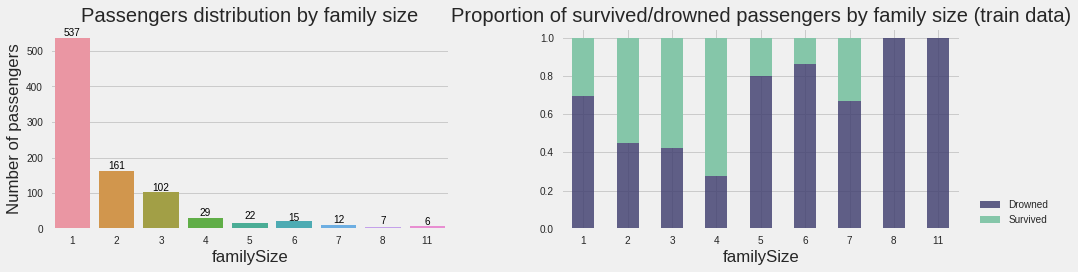

In [52]:
fig = plt.figure(figsize = (15,4))

ax1 = fig.add_subplot(121)
ax = sns.countplot(train['familySize'], ax = ax1)

# calculate passengers for each category
labels = (train['familySize'].value_counts())
# add result numbers on barchart
for i, v in enumerate(labels):
    ax.text(i, v+6, str(v), horizontalalignment = 'center', size = 10, color = 'black')
    
plt.title('Passengers distribution by family size')
plt.ylabel('Number of passengers')

ax2 = fig.add_subplot(122)
d = train.groupby('familySize')['Survived'].value_counts(normalize = True).unstack()
d.plot(kind='bar', color=["#3f3e6fd1", "#85c6a9"], stacked='True', ax = ax2)
plt.title('Proportion of survived/drowned passengers by family size (train data)')
plt.legend(( 'Drowned', 'Survived'), loc=(1.04,0))
plt.xticks(rotation = False)

plt.tight_layout()

In [53]:
# Drop redundant features
train = train.drop(['SibSp', 'Parch', 'Ticket'], axis = 1)
test = test.drop(['SibSp', 'Parch', 'Ticket'], axis = 1)

In [54]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,Cabin,S,C,Q,0,1,2,3,4,familySize
0,1,0,3,0,22.0,7.2500,9,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,2
1,2,1,1,1,38.0,71.2833,3,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2
2,3,1,3,1,26.0,7.9250,9,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1
3,4,1,1,1,35.0,53.1000,3,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,2
4,5,0,3,0,35.0,8.0500,9,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1


## PCA(Principle component analysis)

let’s visualize our final dataset by implementing PCA and plot the graph

In [55]:
columns = train.columns[2:]
from sklearn.preprocessing import StandardScaler
X_train = StandardScaler().fit_transform(train.drop(columns=["PassengerId","Survived"]))

new_df = pd.DataFrame(X_train, columns=columns)

In [56]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 2)
df_pca = pca.fit_transform(new_df)

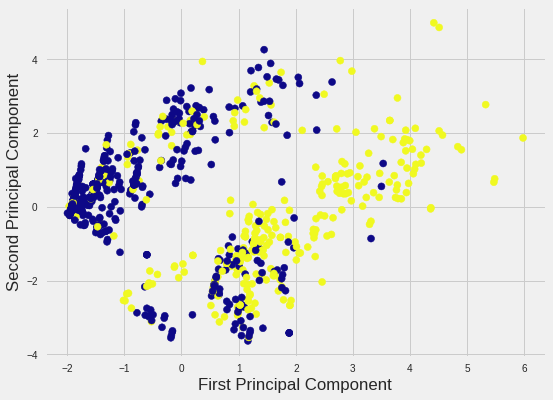

In [57]:
plt.figure(figsize =(8, 6))
plt.scatter(df_pca[:, 0], df_pca[:, 1], c = target, cmap ='plasma')
# labeling x and y axes
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component');

Ourdataset contain some outliers and randomness but still let's use this to train the model.

Dateset is completely ready now!


In [58]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(train.drop(['Survived', 'PassengerId'], axis=1), train['Survived'], test_size = 0.2, random_state=2)

# Decision Tree

In [59]:
from sklearn.tree import DecisionTreeClassifier

dtclf = DecisionTreeClassifier(max_depth = 3).fit(X_train, y_train)

print('Accuracy of Decision Tree classifier on training set: {:.2f}'
     .format(dtclf.score(X_train, y_train)))
print('Accuracy of Decision Tree classifier on test set: {:.2f}'
     .format(dtclf.score(X_test, y_test)))

Accuracy of Decision Tree classifier on training set: 0.83
Accuracy of Decision Tree classifier on test set: 0.79


In [118]:
# from sklearn.tree import plot_tree

# plot_tree(dtclf, feature_names=X_train.columns)

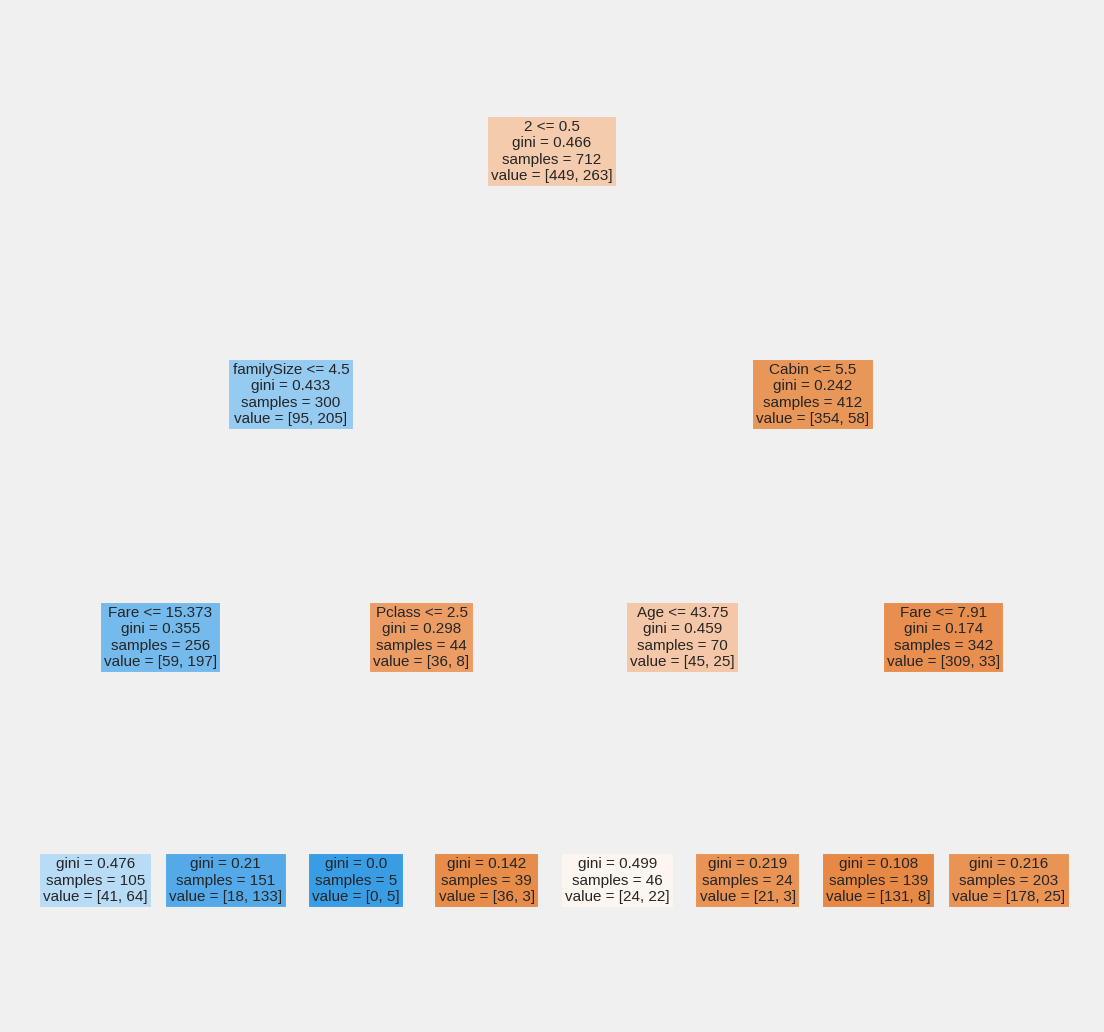

In [114]:
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (4,4), dpi = 300)

tree.plot_tree(dtclf,
               feature_names = X_train.columns, 
               filled = True);

In [106]:
from sklearn.model_selection import KFold, StratifiedKFold, cross_val_score

In [107]:
print("Shape of input data: {} and shape of target variable: {}".format(X_train.shape, y_train.shape))

Shape of input data: (712, 14) and shape of target variable: (712,)


In [108]:
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

cnt = 1
# split()  method generate indices to split data into training and test set.
for train_index, test_index in kf.split(X_train, y_train):
    print(f'Fold:{cnt}, Train set: {len(train_index)}, Test set:{len(test_index)}')
    cnt+=1

Fold:1, Train set: 569, Test set:143
Fold:2, Train set: 569, Test set:143
Fold:3, Train set: 570, Test set:142
Fold:4, Train set: 570, Test set:142
Fold:5, Train set: 570, Test set:142


In [109]:
score = cross_val_score(tree.DecisionTreeClassifier(random_state= 42), X_train, y_train, cv= kf, scoring="accuracy")
print(f'Scores for each fold are: {score}')
print(f'Average score: {"{:.2f}".format(score.mean())}')

Scores for each fold are: [0.83916084 0.70629371 0.74647887 0.82394366 0.75352113]
Average score: 0.77


# Random Forest

In [60]:
from sklearn.ensemble import RandomForestClassifier
rfclf = RandomForestClassifier(random_state=2)

In [61]:
# Set our parameter grid
param_grid = { 
    'criterion' : ['gini', 'entropy'],
    'n_estimators': [100, 300, 500],
    'max_features': ['auto', 'log2'],
    'max_depth' : [3, 5, 7]    
}

In [62]:
from sklearn.model_selection import GridSearchCV

randomForest_CV = GridSearchCV(estimator = rfclf, param_grid = param_grid, cv = 5)
randomForest_CV.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=2),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7],
                         'max_features': ['auto', 'log2'],
                         'n_estimators': [100, 300, 500]})

Let's print our optimal hyperparameters set

In [63]:
randomForest_CV.best_params_

{'criterion': 'gini',
 'max_depth': 7,
 'max_features': 'auto',
 'n_estimators': 100}

In [64]:
rf_clf = RandomForestClassifier(random_state = 2, criterion = 'gini', max_depth = 7, max_features = 'auto', n_estimators = 100)

rf_clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=7, random_state=2)

In [65]:
predictions = rf_clf.predict(X_test)

In [66]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, predictions) * 100

78.77094972067039

In [90]:
from sklearn.tree import export_graphviz

In [91]:
export_graphviz(rf_clf.estimators_[0],
                feature_names=X_train.columns,
                filled=True,
                rounded=True)

'digraph Tree {\nnode [shape=box, style="filled, rounded", color="black", fontname=helvetica] ;\nedge [fontname=helvetica] ;\n0 [label="3 <= 0.5\\ngini = 0.474\\nsamples = 448\\nvalue = [437, 275]", fillcolor="#f5d0b6"] ;\n1 [label="Cabin <= 5.5\\ngini = 0.439\\nsamples = 389\\nvalue = [422, 203]", fillcolor="#f2be98"] ;\n0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;\n2 [label="Sex <= 0.5\\ngini = 0.464\\nsamples = 70\\nvalue = [41, 71]", fillcolor="#abd6f4"] ;\n1 -> 2 ;\n3 [label="Q <= 0.5\\ngini = 0.478\\nsamples = 46\\nvalue = [40, 26]", fillcolor="#f6d3ba"] ;\n2 -> 3 ;\n4 [label="2 <= 0.5\\ngini = 0.48\\nsamples = 14\\nvalue = [8, 12]", fillcolor="#bddef6"] ;\n3 -> 4 ;\n5 [label="Fare <= 73.465\\ngini = 0.278\\nsamples = 4\\nvalue = [1, 5]", fillcolor="#61b1ea"] ;\n4 -> 5 ;\n6 [label="gini = 0.0\\nsamples = 3\\nvalue = [0, 5]", fillcolor="#399de5"] ;\n5 -> 6 ;\n7 [label="gini = 0.0\\nsamples = 1\\nvalue = [1, 0]", fillcolor="#e58139"] ;\n5 -> 7 ;\n8 [label="Cabin <=

In [105]:
import os
from sklearn.tree import export_graphviz
import six
import pydot
from sklearn import tree
dotfile = six.StringIO()
i_tree = 0
for tree_in_forest in rf_clf.estimators_:
    export_graphviz(tree_in_forest,out_file='tree.dot',
    feature_names=X_train.columns,
    filled=True,
    rounded=True)
    (graph,) = pydot.graph_from_dot_file('tree.dot')
    name = 'tree' + str(i_tree)
    graph.write_png(name+  '.png')
    os.system('dot -Tpng tree.dot -o tree.png')
    i_tree +=1

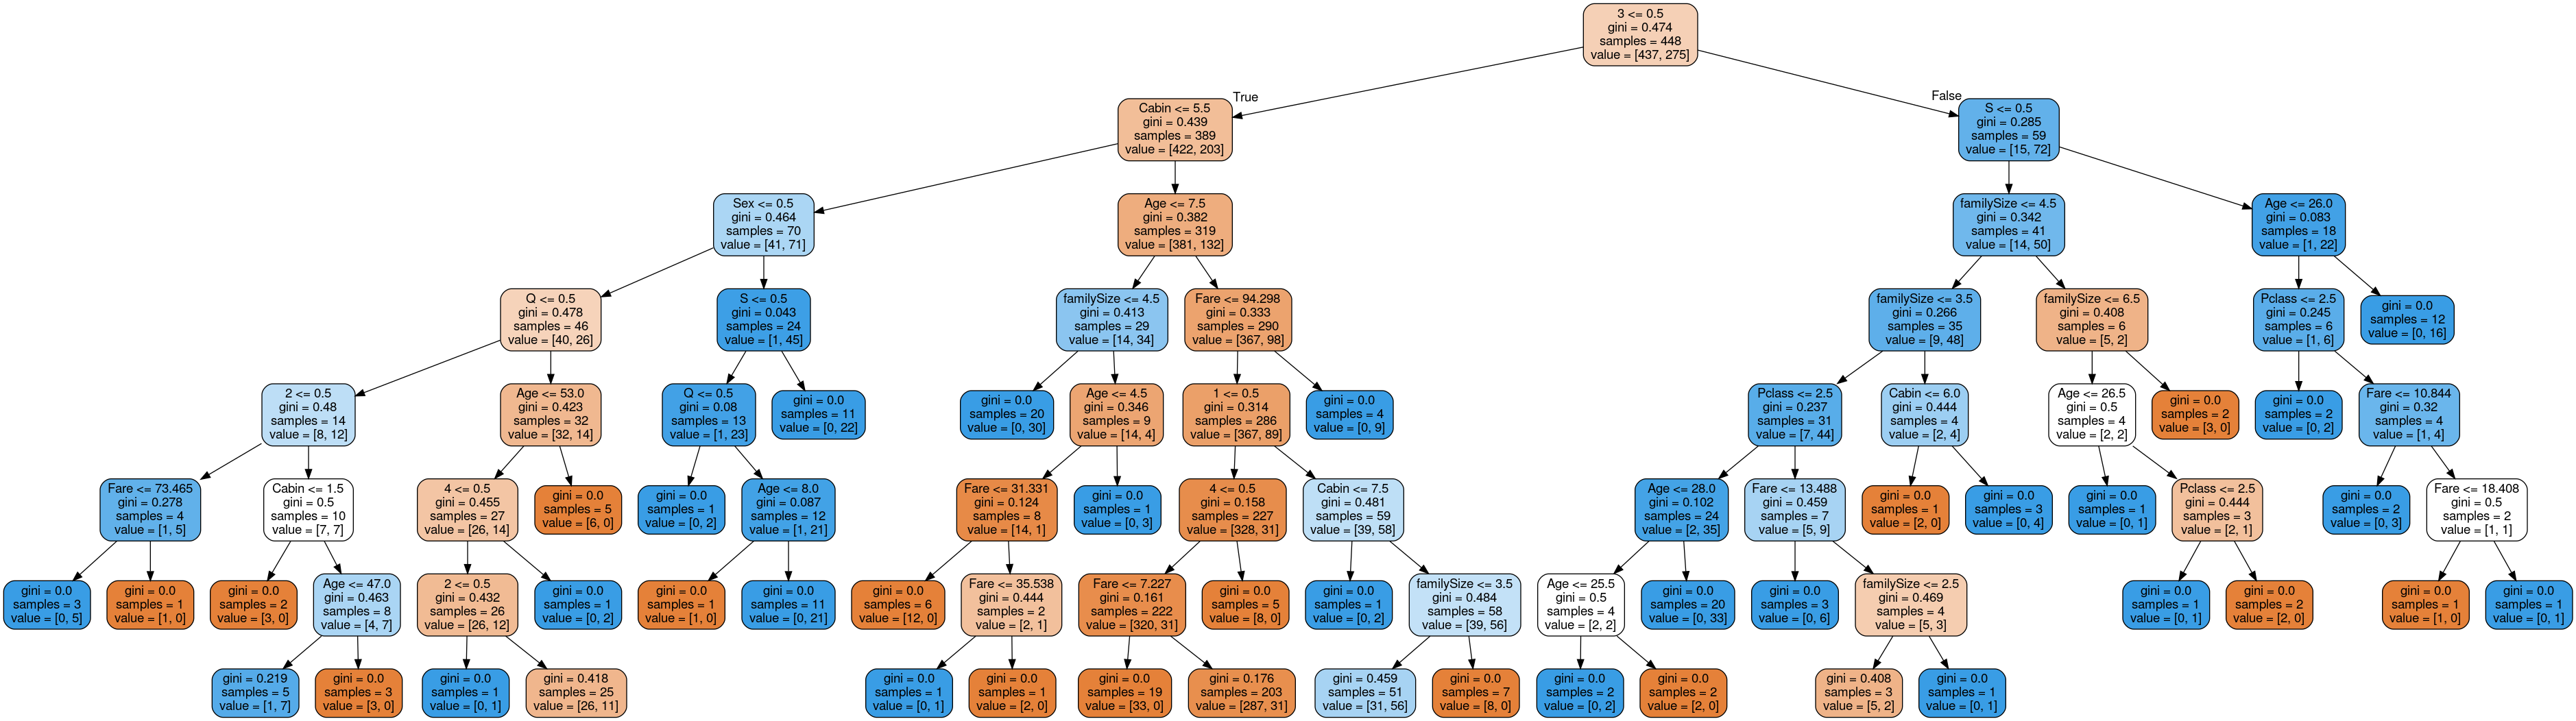

In [117]:
import PIL

PIL.Image.open("../working/tree0.png")